In [1]:
'''
具体分析某坐标对之间的topk路线，直接画到图上
'''

import pandas as pd

all_pairs_dist = pd.read_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist.csv")
all_pairs_dist_ = all_pairs_dist.T

In [2]:
import geohash
from haversine import haversine 
import hmap_new_router

def cal_dist_with_geohash(cur_name): 
    '''
    @params cur_name [('wtms65', 'wtms6j')]
    '''
    # 根据起始结束的geohash 算实际距离
    
    src_pos_area = geohash.decode(cur_name[0])
    src_pos_area = [src_pos_area[1], src_pos_area[0]]

    dst_pos_area = geohash.decode(cur_name[1])
    dst_pos_area = [dst_pos_area[1], dst_pos_area[0]]

    real_dist_center = haversine(src_pos_area, dst_pos_area)

    ret_router, ret_dist = hmap_new_router.Hmap_new_ret_route_pack(src_pos_area, dst_pos_area) # color_router = all_colors[i], 
    return ret_dist

4.395675219207577 []


In [3]:
all_pairs_dist_describe = pd.read_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist_describe.csv")
all_pairs_dist_describe_ = all_pairs_dist_describe.T

In [5]:
print(all_pairs_dist_describe_)

                           0          1         2      3      4      5      6  \
Unnamed: 0             count       mean       std    min    25%    50%    75%   
('wtmt15', 'wtmscx')  2400.0   4.073942  0.668451   3.03    3.6  3.945   4.34   
('wtms7j', 'wtmse9')  2213.0   3.875308  0.797457   3.01   3.44   3.63   4.19   
('wtm7xp', 'wtm7zc')  2171.0   4.269314  0.680579   3.04    3.8   4.18   4.61   
('wtmk68', 'wtmk72')  2023.0   4.241725  1.718908   3.01   3.65    4.2  4.565   
...                      ...        ...       ...    ...    ...    ...    ...   
('wtmk11', 'wtmk69')    11.0      10.43  1.219803   7.64  10.06  10.21  11.05   
('wtms6j', 'wtmsgb')    11.0  13.045455  0.385652   12.0   13.1   13.1   13.2   
('wtme82', 'wtmkr6')    11.0  19.558182  0.844202  18.02   19.4  19.44  19.58   
('wtm7kz', 'wtm7w7')    11.0   8.513636  0.705539   6.99  8.305    8.6    8.7   
('wtme8e', 'wtme84')    11.0   3.960909  0.787064    3.1   3.39    4.0   4.15   

                          7

In [41]:
# 重命名
all_pairs_dist_describe_.rename(columns={0:'count', 1:'mean', 2:'std', 3: 'min', 4:'25%', 5:'50%', 6:'75%', 7:"max"}, inplace = True)
print(all_pairs_dist_describe_)

                       count  mean       std    min    25%    50%    75%  \
('wtmt15', 'wtmscx')  2400.0     4  0.668451   3.03    3.6  3.945   4.34   
('wtms7j', 'wtmse9')  2213.0     3  0.797457   3.01   3.44   3.63   4.19   
('wtm7xp', 'wtm7zc')  2171.0     4  0.680579   3.04    3.8   4.18   4.61   
('wtmk68', 'wtmk72')  2023.0     4  1.718908   3.01   3.65    4.2  4.565   
('wtms6j', 'wtms7j')  1952.0     5  0.896871   3.01   4.68  5.025    5.4   
...                      ...   ...       ...    ...    ...    ...    ...   
('wtmk11', 'wtmk69')    11.0    10  1.219803   7.64  10.06  10.21  11.05   
('wtms6j', 'wtmsgb')    11.0    13  0.385652   12.0   13.1   13.1   13.2   
('wtme82', 'wtmkr6')    11.0    19  0.844202  18.02   19.4  19.44  19.58   
('wtm7kz', 'wtm7w7')    11.0     8  0.705539   6.99  8.305    8.6    8.7   
('wtme8e', 'wtme84')    11.0     3  0.787064    3.1   3.39    4.0   4.15   

                        max  hmap_dist  
('wtmt15', 'wtmscx')    8.8     -0.001  
('wtm

In [42]:
all_pairs_dist_describe_['mean'] = all_pairs_dist_describe_['mean'].astype(int) # all_pairs_dist_describe_['mean'] = all_pairs_dist_describe_['mean'].map(int)

In [45]:
# 筛选里程在upper与lower的top_k条
def select_mile_range(upper, lower, top_k):
    tmp = all_pairs_dist_describe_[((all_pairs_dist_describe_["mean"]) > upper) & ((all_pairs_dist_describe_["mean"]) < lower)]
    return tmp.iloc[0: top_k, :]

                       count  mean       std   min   25%    50%    75%   max  \
('wtmt15', 'wtmscx')  2400.0     4  0.668451  3.03   3.6  3.945   4.34   8.8   
('wtm7xp', 'wtm7zc')  2171.0     4  0.680579  3.04   3.8   4.18   4.61  11.5   
('wtmk68', 'wtmk72')  2023.0     4  1.718908  3.01  3.65    4.2  4.565  71.2   
('wtms6j', 'wtms7j')  1952.0     5  0.896871  3.01  4.68  5.025    5.4  22.0   
('wtm7xp', 'wtme8p')  1914.0     5   1.34363  3.71   4.8   5.29    5.9  50.4   

                      hmap_dist  
('wtmt15', 'wtmscx')     -0.001  
('wtm7xp', 'wtm7zc')     -0.001  
('wtmk68', 'wtmk72')     -0.001  
('wtms6j', 'wtms7j')     -0.001  
('wtm7xp', 'wtme8p')     -0.001  


In [234]:
def draw_certain_route(cur_name, num, my_map_compare_): 
    '''
    @brief 画路线
    @params cur_name [('wtms65', 'wtms6j')]
    @params num 
    @params my_map_compare_ 我的画图类
    '''

    def randomcolor():
        '''
        @brief 获取随机颜色
        '''
        colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color = ""
        for i in range(6):
            color += colorArr[random.randint(0,14)]
        return "#"+color

    start_color = randomcolor()

    src_pos_area = geohash.decode(cur_name[0])
    src_pos_area = [src_pos_area[1], src_pos_area[0]]

    dst_pos_area = geohash.decode(cur_name[1])
    dst_pos_area = [dst_pos_area[1], dst_pos_area[0]]

    # 画geohash的矩形区域
    my_map_compare_.draw_geohash(cur_name[0], color=start_color)
    my_map_compare_.draw_geohash(cur_name[1], color=start_color)
    # 得到路线
    ret_router, ret_dist = hmap_new_router.Hmap_new_ret_route_pack(src_pos_area, dst_pos_area, False) # color_router = all_colors[i], 
    if ret_dist < 0:
        return
    # 画路线
    my_map_compare_.draw_route(src_pos_area, dst_pos_area, ret_router, color_router = start_color, start_tip = cur_name[0] + "_start", end_tip = cur_name[1] + "_end", router_tip = "num: " + str(num) + " pos: (" + cur_name[0] + ", " + cur_name[1] + " )")

In [237]:
import random
from constrast_between import my_map_compare

# 初始化我的地图画布
my_map_compare_ = my_map_compare([120.333, 30.333], [120.333, 30.333])
# 筛出需要的里程范围内的top_k
res_ = select_mile_range(3, 6, 5) # 3-6km中的top 5

for i, r in res_.iterrows():
    # 画top k
    draw_certain_route((i.split("'")[1], i.split("'")[3]), r['count'], my_map_compare_)
    
my_map_compare_.save_("router_mile_70-75")

<class 'pandas.core.frame.DataFrame'>
('wtmt15', 'wtmscx')
[120.2838134765625, 30.42938232421875] [120.3057861328125, 30.40740966796875]
('wtm7xp', 'wtm7zc')
[120.1959228515625, 30.18768310546875] [120.2288818359375, 30.19866943359375]
('wtmk68', 'wtmk72')
[119.9981689453125, 30.28106689453125] [120.0311279296875, 30.28106689453125]
('wtms6j', 'wtms7j')
[120.3277587890625, 30.30853271484375] [120.3717041015625, 30.30853271484375]
('wtm7xp', 'wtme8p')
[120.1959228515625, 30.18768310546875] [120.2398681640625, 30.18768310546875]


<Figure size 2304x360 with 0 Axes>

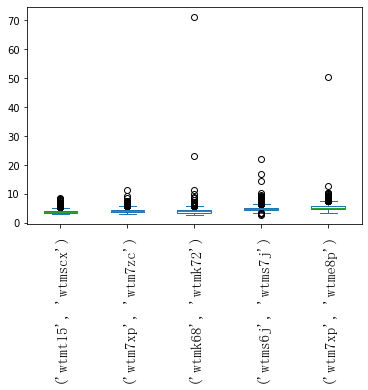

In [238]:

def draw_box(res_, thresh = 100):
    '''
    @brief 画topk的里程箱线图
    @params res_ 
    '''
    all_router = pd.DataFrame()
    
    for i, r in res_.iterrows():
        new_row = all_pairs_dist[all_pairs_dist['Unnamed: 0'] == i].drop(['cnt'], axis = 1)
        all_router = pd.concat([all_router, new_row])
        # print(new_row)
        # break


    from matplotlib.font_manager import FontProperties 
    from matplotlib import pyplot as plt
    import numpy as np
    font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=15) 

    plt.figure(figsize=(32,5))
    # 解决标注乱码的问题
    res_T = all_router.T

    res_index = res_T.iloc[0, :].index
    res_name = res_T.iloc[0, :].values
    # 给下标重命名
    for i in range(0, len(res_name)) :
        res_T.rename(columns={res_index[i]: res_name[i]}, inplace = True)   
    res_T = res_T.drop(res_T.index[0])
    # 筛除一些异常值
    res_T = res_T[res_T < thresh]

    ax = res_T.plot.box(rot='90')
    for label in ax.get_xticklabels() : 
        label.set_fontproperties(font)

draw_box(res_, 100)

In [239]:
# 打印describe

## 计算实际距离与上限！ Q3+1.5IQR
res_["upper_thresh"] = res_["75%"] + 1.5 * (res_["75%"] - res_["25%"])

for i, r in enumerate(res_.values):
    # print(i, r, res_.index[i])
    cur_pair = res_.index[i]
    res_.iloc[i , 8] = cal_dist_with_geohash((cur_pair.split("'")[1], cur_pair.split("'")[3]))
    # break

res_.T

,"('wtmt15', 'wtmscx')","('wtm7xp', 'wtm7zc')","('wtmk68', 'wtmk72')","('wtms6j', 'wtms7j')","('wtm7xp', 'wtme8p')"
count,2400.0,2171.0,2023.0,1952.0,1914.0
mean,4,4,4,5,5
std,0.668451,0.680579,1.718908,0.896871,1.34363
min,3.03,3.04,3.01,3.01,3.71
25%,3.6,3.8,3.65,4.68,4.8
50%,3.945,4.18,4.2,5.025,5.29
75%,4.34,4.61,4.565,5.4,5.9
max,8.8,11.5,71.2,22.0,50.4
hmap_dist,5.101006,4.784046,4.576899,5.64056,5.521792
upper_thresh,5.45,5.825,5.9375,6.48,7.55


In [240]:

# 给all_pairs添加一个异常上限值...
all_pairs_dist_describe = pd.read_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist_describe.csv")


In [249]:
all_pairs_dist_describe_T = all_pairs_dist_describe.T
all_pairs_dist_describe_T

res_index = all_pairs_dist_describe_T.iloc[0, :].index
res_name = all_pairs_dist_describe_T.iloc[0, :].values

for i in range(0, len(res_name)) :
    all_pairs_dist_describe_T.rename(columns={res_index[i]: res_name[i]}, inplace = True)
    
all_pairs_dist_describe_T = all_pairs_dist_describe_T.drop(["Unnamed: 0"])

In [250]:
all_pairs_dist_describe_T["upper_thresh"] = all_pairs_dist_describe_T["75%"] + 1.5 * (all_pairs_dist_describe_T["75%"] - all_pairs_dist_describe_T["25%"])

In [252]:
all_pairs_dist_describe_T.to_csv("C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-23\\data\\all_pairs_with_dist_describe_with_thresh.csv")